# 01. Single neuron and linear regression

## 01.1 Create a function (single linear neuron) with some inputs and outputs

In [48]:
%reset

import numpy as np

# Define the true weights and bias for a single linear neuron
# (see also http://d2l.ai/chapter_linear-networks/linear-regression-scratch.html)
true_weights = np.array([2, -3.4])
true_bias = 4.2

# Create some inputs using a standard normal distribution
number_examples = 1000
number_features = len(true_weights)
true_inputs = np.random.normal(loc=0.0, scale=1.0, size=(number_examples, number_features))

# Create some noise for all the examples using a normal distribution
true_noise = np.random.normal(loc=0.0, scale=0.01, size=number_examples)
    
# Compute the true outputs using the inputs, and the true weights, bias, and noise
true_outputs = np.matmul(true_inputs, true_weights) + true_bias + true_noise

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## 01.2. Learn the parameters of the neuron using gradient descent

In [49]:
# Define the training parameters
number_epochs = 10
batch_size = 10
learning_rate = 0.03

# Initialize the predicted weights and bias
predicted_weights = np.random.normal(loc=0.0, scale=0.01, size=number_features)
predicted_bias = 0

# Initialize the loss for all the batches
number_batches = int(np.ceil(number_examples/batch_size))
predicted_loss = np.zeros(number_batches)

# Loop over the epochs
for i in range(number_epochs):
    
    # Loop over the batches
    k = 0
    for j in range(0, number_examples, batch_size):
        
        # Derive the end index of the batch
        j2 = min(j+batch_size, number_examples)
    
        # Compute the predicted outputs using the inputs, and the predicted weights and bias
        predicted_outputs = np.matmul(true_inputs[j:j2, :], predicted_weights) + predicted_bias

        # Compute the difference between the predicted outputs and the true outputs
        output_differences = predicted_outputs-true_outputs[j:j2]

        # Compute the loss using the mean squared error
        predicted_loss[k] = np.mean(0.5*np.power(output_differences, 2))
        
        # Do not need to make the last updates after computing the last loss
        if i < number_epochs-1 or k < number_batches-1:
            
            # Update the predicted weights and bias using gradient descent, with the derivative of the loss function
            predicted_weights -= learning_rate*np.mean(true_inputs[j:j2, :]*(output_differences)[:, np.newaxis], axis=0)
            predicted_bias -= learning_rate*np.mean(output_differences, axis=0)
            
        # Update the index
        k = k+1
    
    # Print the epoch and loss
    print(f"Epoch: {i}; loss: {np.mean(predicted_loss)}")
    
# Print the predicted weights and bias
print("")
print(f"Predicted weights: {predicted_weights}")
print(f"Predicted bias: {predicted_bias}")

Epoch: 0; loss: 2.8178068093399515
Epoch: 1; loss: 0.008657554420596639
Epoch: 2; loss: 7.830017943958494e-05
Epoch: 3; loss: 5.141891440363032e-05
Epoch: 4; loss: 5.1363440814342625e-05
Epoch: 5; loss: 5.1365079908663894e-05
Epoch: 6; loss: 5.136518882777341e-05
Epoch: 7; loss: 5.136519515922528e-05
Epoch: 8; loss: 5.136519552823079e-05
Epoch: 9; loss: 5.1365195549856344e-05

Predicted weights: [ 1.99999494 -3.40075876]
Predicted bias: 4.200677829374865


## 01.3. Learn the parameters of the neuron using gradient descent in Keras

In [3]:
import tensorflow as tf

# Define the training parameters
number_epochs = 10
batch_size = 10
learning_rate = 0.03

# Initialize the model (as a feedforward NN)
model = tf.keras.Sequential()

# Add an input with the number of features
model.add(tf.keras.Input(shape=number_features))

# Add a densely-connected NN layer without activation and with initialized weights and bias
model.add(tf.keras.layers.Dense(1, activation=None, \
                                kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01), \
                                bias_initializer="zeros"))

# Configure the model for training with gradient descent optimizer and mean squared error loss
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              loss="mean_squared_error")

# Train the model give the batch size and number of epochs
model.fit(x=true_inputs, y=true_outputs, batch_size=batch_size, epochs=number_epochs, verbose=1)

# Print the predicted weights and bias
print("")
print(f"Predicted weights: {model.get_weights()[0][:, 0]}")
print(f"Predicted bias: {model.get_weights()[1][0]}")

Epoch 1/10
100/100 [==============================] - 0s 354us/step - loss: 8.5697
Epoch 2/10
100/100 [==============================] - 0s 343us/step - loss: 1.5144e-04
Epoch 3/10
100/100 [==============================] - 0s 354us/step - loss: 1.0111e-04
Epoch 4/10
100/100 [==============================] - 0s 354us/step - loss: 9.9907e-05
Epoch 5/10
100/100 [==============================] - 0s 374us/step - loss: 9.6224e-05
Epoch 6/10
100/100 [==============================] - 0s 343us/step - loss: 9.2783e-05
Epoch 7/10
100/100 [==============================] - 0s 343us/step - loss: 1.0346e-04
Epoch 8/10
100/100 [==============================] - 0s 343us/step - loss: 1.0498e-04
Epoch 9/10
100/100 [==============================] - 0s 343us/step - loss: 9.9771e-05
Epoch 10/10
100/100 [==============================] - 0s 354us/step - loss: 9.7006e-05

Predicted weights: [ 1.9996102 -3.3997617]
Predicted bias: 4.199385166168213


## 01.4. Learn the parameters of the neuron using an evolutionary algorithm

In [4]:
# Define the training parameters
number_epochs = 10
batch_size = 10
number_individuals = 10
number_parents = 2
mutation_rate = 0.01

# Initialize the predicted weights and bias for all the individuals
predicted_weights = np.random.normal(loc=0.0, scale=0.01, size=(number_features, number_individuals))
predicted_bias = np.zeros((1, number_individuals))

# Initialize the loss for all the batches and for all the individuals
number_batches = int(np.ceil(number_examples/batch_size))
predicted_loss = np.zeros((number_batches, number_individuals))

# Loop over the epochs
for i in range(number_epochs):
    
    # Loop over the batches
    k = 0
    for j in range(0, number_examples, batch_size):
        
        # Derive the end index of the batch
        j2 = min(j+batch_size, number_examples)
    
        # Compute the predicted outputs using the inputs, and the predicted weights and bias, for every individual
        predicted_outputs = np.matmul(true_inputs[j:j2, :], predicted_weights) + predicted_bias

        # Compute the loss using the mean squared error, for every individual
        predicted_loss[k, :] = np.mean(np.power(predicted_outputs-true_outputs[j:j2, np.newaxis], 2), axis=0)
        
        # Do not need to make the last updates after computing the last loss
        if i < number_epochs-1 or k < number_batches-1:
        
            # Get the indices of the parents (the fittest individuals)
            parent_indices = np.argsort(predicted_loss[k, :])[0:number_parents]

            # Compute the mutation scale using the root mean square error
#             mutation_scale = mutation_rate*np.mean(np.sqrt(predicted_loss[k, parent_indices]))
            mutation_scale = mutation_rate
            
            # Update the predicted weights and bias using evolutionary algorithm, doing crossover and mutation
            predicted_weights = np.mean(predicted_weights[:, parent_indices], axis=1)[:, np.newaxis] \
            + np.random.normal(loc=0.0, scale=mutation_scale, size=(number_features, number_individuals))
            predicted_bias = np.mean(predicted_bias[:, parent_indices]) \
            + np.random.normal(loc=0.0, scale=mutation_scale, size=(1, number_individuals))
        
        # Update the index
        k = k+1
        
    # Print the epoch and loss
    print(f"Epoch: {i}; loss: {np.mean(predicted_loss)}")
    
# Print the predicted weights and bias
print("")
print(f"Predicted weights: {np.mean(predicted_weights, axis=1)}")
print(f"Predicted bias: {np.mean(predicted_bias)}")

Epoch: 0; loss: 26.16919771857581
Epoch: 1; loss: 15.89573684352735
Epoch: 2; loss: 8.374283380005487
Epoch: 3; loss: 2.9675768340124478
Epoch: 4; loss: 0.38137886645304675
Epoch: 5; loss: 0.0005220220825590036
Epoch: 6; loss: 0.00048325837539071447
Epoch: 7; loss: 0.0005137403673791562
Epoch: 8; loss: 0.0005089096714666468
Epoch: 9; loss: 0.0004962522573057658

Predicted weights: [ 1.9938385 -3.4027235]
Predicted bias: 4.209371000895826


## 01.4.2. Learn the parameters of the neuron using a simpler evolutionary algorithm

In [5]:
# Define the training parameters
number_epochs = 10
batch_size = 10
mutation_scale = 0.01

# Initialize the predicted weights and bias
predicted_weights = np.random.normal(loc=0.0, scale=0.01, size=number_features)
predicted_bias = 0

# Initialize the loss for all the batches
number_batches = int(np.ceil(number_examples/batch_size))
predicted_loss = np.zeros(number_batches)

# Loop over the epochs
for i in range(number_epochs):
    
    # Loop over the batches
    k = 0
    for j in range(0, number_examples, batch_size):
        
        # Derive the end index of the batch
        j2 = min(j+batch_size, number_examples)
    
        # Compute the predicted outputs using the inputs, and the predicted weights and bias
        predicted_outputs = np.matmul(true_inputs[j:j2, :], predicted_weights) + predicted_bias
        
        # Compute the loss using the mean squared error
        predicted_loss[k] = np.mean(0.5*np.power(predicted_outputs-true_outputs[j:j2], 2))
        
        # Initialize the next loss
        predicted_loss2 = np.inf                    
        
        # While the next predicted loss is higher
        while predicted_loss2 >= predicted_loss[k]:
            
            # Mutate the weights and biases
            predicted_weights2 = predicted_weights + np.random.normal(loc=0.0, scale=mutation_scale, size=number_features)
            predicted_bias2 = predicted_bias + np.random.normal(loc=0.0, scale=mutation_scale, size=1)
            
            # Compute the new outputs and loss
            predicted_outputs2 = np.matmul(true_inputs[j:j2, :], predicted_weights2) + predicted_bias2
            predicted_loss2 = np.mean(0.5*np.power(predicted_outputs2-true_outputs[j:j2], 2))
            
        # Update the weights, biases, and loss
        predicted_weights = predicted_weights2
        predicted_bias = predicted_bias2
        predicted_loss[k] = predicted_loss2
        
        # Update the index
        k = k+1
    
    # Print the epoch and loss
    print(f"Epoch: {i}; loss: {np.mean(predicted_loss)}")
    
# Print the predicted weights and bias
print("")
print(f"Predicted weights: {predicted_weights}")
print(f"Predicted bias: {predicted_bias}")

Epoch: 0; loss: 14.065245619831437
Epoch: 1; loss: 10.475700426308524
Epoch: 2; loss: 7.542908621351353
Epoch: 3; loss: 5.159025379365726
Epoch: 4; loss: 3.122533523693872
Epoch: 5; loss: 1.5003200038468014
Epoch: 6; loss: 0.5791979401322016
Epoch: 7; loss: 0.09645098729289182
Epoch: 8; loss: 0.0001001751696473215
Epoch: 9; loss: 7.551244142200755e-05

Predicted weights: [ 2.00399397 -3.40051534]
Predicted bias: [4.20423564]


# 02. Single neuron and softmax regression

## 02.1. Prepare a dataset for a multiclass classification problem

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


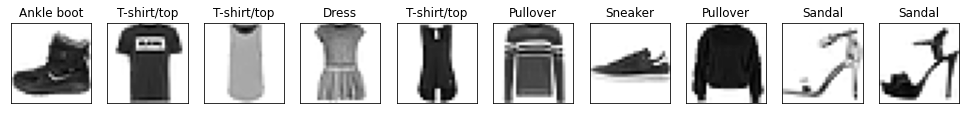

In [40]:
%reset

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Import the fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', \
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show some of the data
plt.figure(figsize=(17, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

# Get the number of train and test examples and the sizes of the inputs and outputs
number_train = np.shape(train_images)[0]
number_test = np.shape(test_images)[0]
input_size = np.shape(train_images)[1]*np.shape(train_images)[2]
output_size = len(class_names)

# Reshape the inputs and normalize them
train_inputs = np.reshape(train_images, (number_train, input_size))
train_inputs = train_inputs/255
test_inputs = np.reshape(test_images, (number_test, input_size))
test_inputs = test_inputs/255

# Transform the outputs from label numbers to one-hot vectors
train_outputs = np.zeros((number_train, output_size))
for i in range(number_train):
    train_outputs[i, train_labels[i]] = 1
test_outputs = np.zeros((number_test, output_size))
for i in range(number_test):
    test_outputs[i, test_labels[i]] = 1

## 02.2. Learn the parameters of a neuron using gradient descent

In [41]:
# Define the training parameters
number_epochs = 10
batch_size = 256
learning_rate = 0.1

# Initialize the weights and biases
train_weights = np.random.normal(loc=0.0, scale=0.01, size=(input_size, output_size))
train_biases = np.zeros(output_size)

# Initialize the loss and the accuracy for all the batches
number_batches = int(np.ceil(number_train/batch_size))
train_loss = np.zeros(number_batches)
train_accuracy = np.zeros(number_batches)

# Loop over the epochs
for i in range(number_epochs):
    
    # Compute the predicted test outputs using the test inputs, and the learned weights and biases
    test_outputs2 = np.matmul(test_inputs, train_weights) + train_biases
    
    # Compute the conditional probabilities of each class using the softmax function
    # (modified to avoid numerical stability issues)
    test_outputs2 = test_outputs2-np.max(test_outputs2, axis=1)[:, np.newaxis]
    test_exp = np.exp(test_outputs2)
    test_softmax = test_exp/np.sum(test_exp, axis=1)[:, np.newaxis]
    
    # Compute the classification accuracy given the true test labels
    test_accuracy = np.mean(np.argmax(test_softmax, axis=1)==test_labels)
    
    # Loop over the batches
    k = 0
    for j in range(0, number_train, batch_size):
        
        # Derive the end index for the current batch
        j2 = min(j+batch_size, number_train)
    
        # Compute the predicted train outputs using the train inputs, and the learned weights and biases
        train_outputs2 = np.matmul(train_inputs[j:j2, :], train_weights) + train_biases
        
        # Compute the conditional probabilities of each class using the softmax function
        # (modified to avoid numerical stability issues)
        train_outputs2 = train_outputs2-np.max(train_outputs2, axis=1)[:, np.newaxis]
        train_exp = np.exp(train_outputs2)
        train_softmax = train_exp/np.sum(train_exp, axis=1)[:, np.newaxis]
        
        # Compute the cross-entropy loss given the true train outputs
        # (rewritten to avoid numerical stability issues)
#         train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]*np.log(train_softmax), axis=1))
        train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]\
                                        *(train_outputs2-np.log(np.sum(train_exp, axis=1)[:, np.newaxis])), axis=1))
        
        # Compute the classification accuracy given the true train labels
        train_accuracy[k] = np.mean(np.argmax(train_softmax, axis=1)==train_labels[j:j2])
        
        # Do not need to make the last updates after computing the last loss
        if i < number_epochs-1 or k < number_batches-1:
            
            # Compute the derivative of the loss wrt the output (logit before softmax)
            train_derivative = train_softmax-train_outputs[j:j2, :]
            
            # Get the real batch size
            batch_size2 = j2-j
            
            # Update the weights and biases using gradient descent
            train_weights = train_weights-learning_rate*np.matmul(train_inputs[j:j2, :].T, train_derivative)/batch_size2
            train_biases = train_biases-learning_rate*np.sum(train_derivative, axis=0)/batch_size2
            
        # Update the index
        k = k+1
        
    # Print the epoch and loss
    print(f"Epoch: {i}; train loss: {np.mean(train_loss)}; train accuracy: {np.mean(train_accuracy)}; test accuracy: {test_accuracy}")

Epoch: 0; train loss: 0.7839464409853965; train accuracy: 0.7499058067375886; test accuracy: 0.1351
Epoch: 1; train loss: 0.5700196939640748; train accuracy: 0.812638519503546; test accuracy: 0.7855
Epoch: 2; train loss: 0.5250399792070662; train accuracy: 0.8255984042553192; test accuracy: 0.811
Epoch: 3; train loss: 0.5009203389810575; train accuracy: 0.8316655585106383; test accuracy: 0.8194
Epoch: 4; train loss: 0.485130030500342; train accuracy: 0.8365359042553191; test accuracy: 0.8244
Epoch: 5; train loss: 0.47369480369247396; train accuracy: 0.84026484929078; test accuracy: 0.827
Epoch: 6; train loss: 0.46489115482651205; train accuracy: 0.8426750886524822; test accuracy: 0.8289
Epoch: 7; train loss: 0.4578281227460323; train accuracy: 0.844919104609929; test accuracy: 0.8323
Epoch: 8; train loss: 0.4519897178943545; train accuracy: 0.8466145833333333; test accuracy: 0.8332
Epoch: 9; train loss: 0.44705253709351034; train accuracy: 0.8478280141843971; test accuracy: 0.8343


## 02.3. Make predictions using the trained neuron

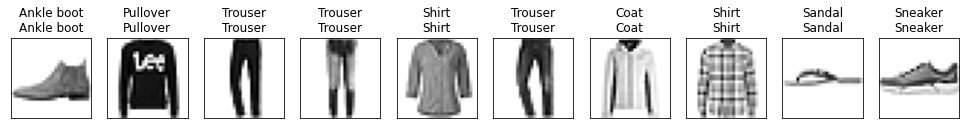

In [42]:
# Compute the predicted test outputs using the test inputs, and the learned weights and biases
test_outputs2 = np.matmul(test_inputs, train_weights) + train_biases

# Compute the conditional probabilities of each class using the softmax function
# (modified to avoid numerical stability issues)
test_outputs2 = test_outputs2-np.max(test_outputs2, axis=1)[:, np.newaxis]
test_exp = np.exp(test_outputs2)
test_softmax = test_exp/np.sum(test_exp, axis=1)[:, np.newaxis]

# Compute the predicted labels
test_labels2 = np.argmax(test_softmax, axis=1)

# Show the data with the true and predicted labels
plt.figure(figsize=(17, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(class_names[test_labels[i]] + "\n" + class_names[test_labels2[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

## 02.4. Learn the parameters of a neuron using gradient descent in Keras

In [4]:
import tensorflow as tf

# Define the training parameters
number_epochs = 10
batch_size = 256
learning_rate = 0.1

# Initialize the model (as a feedforward NN)
model = tf.keras.Sequential()

# Add an input with the number of features
model.add(tf.keras.Input(shape=input_size))

# Add a densely-connected NN layer without activation and with initialized weights and bias
model.add(tf.keras.layers.Dense(output_size, activation=None, \
                                kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01), \
                                bias_initializer="zeros"))

# Configure the model for training with gradient descent optimizer and cross-entropy loss
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate), \
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), \
              metrics=["accuracy"])

# Train the model give the batch size and number of epochs
model.fit(x=train_inputs, y=train_outputs, batch_size=batch_size, epochs=number_epochs, verbose=1)

Epoch 1/10
235/235 [==============================] - 0s 786us/step - loss: 1.0260 - accuracy: 0.6745
Epoch 2/10
235/235 [==============================] - 0s 778us/step - loss: 0.5864 - accuracy: 0.8079
Epoch 3/10
235/235 [==============================] - 0s 765us/step - loss: 0.5351 - accuracy: 0.8228
Epoch 4/10
235/235 [==============================] - 0s 782us/step - loss: 0.5028 - accuracy: 0.8317
Epoch 5/10
235/235 [==============================] - 0s 799us/step - loss: 0.4893 - accuracy: 0.8365
Epoch 6/10
235/235 [==============================] - 0s 774us/step - loss: 0.4764 - accuracy: 0.8387
Epoch 7/10
235/235 [==============================] - 0s 782us/step - loss: 0.4682 - accuracy: 0.8408
Epoch 8/10
235/235 [==============================] - 0s 821us/step - loss: 0.4630 - accuracy: 0.8431
Epoch 9/10
235/235 [==============================] - 0s 765us/step - loss: 0.4537 - accuracy: 0.8467
Epoch 10/10
235/235 [==============================] - 0s 765us/step - loss: 0.440

## 02.5. Learn the parameters of a neuron using an EA

In [36]:
# Define the training parameters
number_epochs = 10
batch_size = 256
number_individuals = 10
number_parents = 2
mutation_rate = 0.01

# Initialize the weights and biases for all the individuals
train_weights = np.random.normal(loc=0.0, scale=0.01, size=(input_size, output_size, number_individuals))
train_biases = np.zeros((output_size, number_individuals))

# Initialize the loss and the accuracy for all the batches and for all the individuals
number_batches = int(np.ceil(number_train/batch_size))
train_loss = np.zeros((number_batches, number_individuals))
train_accuracy = np.zeros((number_batches, number_individuals))

# Loop over the epochs
for i in range(number_epochs):
    
    # Compute the predicted test outputs using the test inputs, and the learned weights and biases
    test_outputs2 = np.matmul(test_inputs, np.mean(train_weights, axis=2)) + np.mean(train_biases, axis=1)[np.newaxis, :]
    
    # Compute the conditional probabilities of each class using the softmax function
    # (modified to avoid numerical stability issues)
    test_outputs2 = test_outputs2-np.max(test_outputs2, axis=1)[:, np.newaxis]
    test_exp = np.exp(test_outputs2)
    test_softmax = test_exp/np.sum(test_exp, axis=1)[:, np.newaxis]
    
    # Compute the classification accuracy given the true test labels
    test_accuracy = np.mean(np.argmax(test_softmax, axis=1)==test_labels)
    
    # Loop over the batches
    k = 0
    for j in range(0, number_train, batch_size):
        
        # Derive the end index for the current batch
        j2 = min(j+batch_size, number_train)
    
        # Compute the predicted train outputs using the train inputs, and the learned weights and biases, for every individual
        train_outputs2 = np.tensordot(train_inputs[j:j2, :], train_weights, axes=(1,0)) + train_biases[np.newaxis, :, :]
        
        # Compute the conditional probabilities of each class using the softmax function
        # (modified to avoid numerical stability issues)
        train_outputs2 = train_outputs2-np.max(train_outputs2, axis=1)[:, np.newaxis, :]
        train_exp = np.exp(train_outputs2)
        train_softmax = train_exp/np.sum(train_exp, axis=1)[:, np.newaxis, :]
        
        # Compute the cross-entropy loss given the true train outputs
        # (rewritten to avoid numerical stability issues)
#         train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :, np.newaxis]*np.log(train_softmax), axis=1), axis=0)
        train_loss[k, :] = np.mean(-np.sum(train_outputs[j:j2, :, np.newaxis]\
                                        *(train_outputs2-np.log(np.sum(train_exp, axis=1)[:, np.newaxis, :])), axis=1), axis=0)
        
        # Compute the classification accuracy given the true train labels
        train_accuracy[k, :] = np.mean(np.argmax(train_softmax, axis=1) == train_labels[j:j2, np.newaxis], axis=0)
        
        # Do not need to make the last updates after computing the last loss
        if i < number_epochs-1 or k < number_batches-1:
            
            # Get the indices of the parents (the fittest individuals)
            parent_indices = np.argsort(train_loss[k, :])[0:number_parents]

            # Compute the mutation scale using the root mean square error
#             mutation_scale = 0.001*np.mean(np.sqrt(train_loss[k, parent_indices]))
            mutation_scale = mutation_rate
            
            # Update the weights and bias using EA, doing crossover and mutation
            train_weights = np.mean(train_weights[:, :, parent_indices], axis=2)[:, :, np.newaxis] \
            + np.random.normal(loc=0.0, scale=mutation_scale, size=(input_size, output_size, number_individuals))
            train_biases = np.mean(train_biases[:, parent_indices], axis=1)[:, np.newaxis] \
            + np.random.normal(loc=0.0, scale=mutation_scale, size=(output_size, number_individuals))
            
        # Update the index
        k = k+1
        
    # Print the epoch and loss
    print(f"Epoch: {i}; train loss: {np.mean(train_loss)}; train accuracy: {np.mean(train_accuracy)}; test accuracy: {test_accuracy}")

Epoch: 0; train loss: 1.4465094193881702; train accuracy: 0.5345279255319149; test accuracy: 0.07
Epoch: 1; train loss: 0.9218235883082819; train accuracy: 0.6845528590425531; test accuracy: 0.644
Epoch: 2; train loss: 0.8139263195166209; train accuracy: 0.7183649157801419; test accuracy: 0.7024
Epoch: 3; train loss: 0.760241497606201; train accuracy: 0.7354892508865248; test accuracy: 0.7257
Epoch: 4; train loss: 0.7459400614672582; train accuracy: 0.739726285460993; test accuracy: 0.7304
Epoch: 5; train loss: 0.7301011253673003; train accuracy: 0.7481776374113476; test accuracy: 0.7404
Epoch: 6; train loss: 0.7234255716094935; train accuracy: 0.752698359929078; test accuracy: 0.7444
Epoch: 7; train loss: 0.7211583417899639; train accuracy: 0.7531155806737588; test accuracy: 0.7407
Epoch: 8; train loss: 0.7126968935196831; train accuracy: 0.757130429964539; test accuracy: 0.749
Epoch: 9; train loss: 0.6986442258115251; train accuracy: 0.763071254432624; test accuracy: 0.7504


## 02.5.2. Learn the parameters of a neuron using a simpler EA

In [45]:
# Define the training parameters
number_epochs = 10
batch_size = 256
mutation_scale = 0.01

# Initialize the weights and biases
train_weights = np.random.normal(loc=0.0, scale=0.01, size=(input_size, output_size))
train_biases = np.zeros(output_size)

# Initialize the loss and the accuracy for all the batches
number_batches = int(np.ceil(number_train/batch_size))
train_loss = np.zeros(number_batches)
train_accuracy = np.zeros(number_batches)

# Loop over the epochs
for i in range(number_epochs):
    
    # Compute the predicted test outputs using the test inputs, and the learned weights and biases
    test_outputs2 = np.matmul(test_inputs, train_weights) + train_biases
    
    # Compute the conditional probabilities of each class using the softmax function
    # (modified to avoid numerical stability issues)
    test_outputs2 = test_outputs2-np.max(test_outputs2, axis=1)[:, np.newaxis]
    test_exp = np.exp(test_outputs2)
    test_softmax = test_exp/np.sum(test_exp, axis=1)[:, np.newaxis]
    
    # Compute the classification accuracy given the true test labels
    test_accuracy = np.mean(np.argmax(test_softmax, axis=1)==test_labels)
    
    # Loop over the batches
    k = 0
    for j in range(0, number_train, batch_size):
        
        # Derive the end index for the current batch
        j2 = min(j+batch_size, number_train)
    
        # Compute the predicted train outputs using the train inputs, and the learned weights and biases
        train_outputs2 = np.matmul(train_inputs[j:j2, :], train_weights) + train_biases
        
        # Compute the conditional probabilities of each class using the softmax function
        # (modified to avoid numerical stability issues)
        train_outputs2 = train_outputs2-np.max(train_outputs2, axis=1)[:, np.newaxis]
        train_exp = np.exp(train_outputs2)
        train_softmax = train_exp/np.sum(train_exp, axis=1)[:, np.newaxis]
        
        # Compute the cross-entropy loss given the true train outputs
        # (rewritten to avoid numerical stability issues)
#         train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]*np.log(train_softmax), axis=1))
        train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]\
                                        *(train_outputs2-np.log(np.sum(train_exp, axis=1)[:, np.newaxis])), axis=1))
        
        # Compute the classification accuracy given the true train labels
        train_accuracy[k] = np.mean(np.argmax(train_softmax, axis=1)==train_labels[j:j2])
        
        # Do not need to make the last updates after computing the last loss
        if i < number_epochs-1 or k < number_batches-1:
            
            # Initialize the next loss
            train_loss2 = np.inf
#             train_accuracy2 = -np.inf
            
            # While the next loss is higher
            while train_loss2 >= train_loss[k]:# or train_accuracy2 <= train_accuracy[k]:
                
                # Mutate the weights and biases
                train_weights2 = train_weights + np.random.normal(loc=0.0, scale=mutation_scale, size=(input_size, output_size))
                train_biases2 = train_biases + np.random.normal(loc=0.0, scale=mutation_scale, size=output_size)

                # Compute the new outputs and loss
                train_outputs2 = np.matmul(train_inputs[j:j2, :], train_weights2) + train_biases2
                train_outputs2 = train_outputs2-np.max(train_outputs2, axis=1)[:, np.newaxis]
                train_exp = np.exp(train_outputs2)
                train_softmax = train_exp/np.sum(train_exp, axis=1)[:, np.newaxis]
                train_loss2 = np.mean(-np.sum(train_outputs[j:j2, :]
                                              *(train_outputs2-np.log(np.sum(train_exp, axis=1)[:, np.newaxis])), axis=1))
                train_accuracy2 = np.mean(np.argmax(train_softmax, axis=1)==train_labels[j:j2])
                
            # Update the weights, biases, and loss
            train_weights = train_weights2
            train_biases = train_biases2
#             train_weights = train_weights+(train_weights2-train_weights)
#             train_biases = train_biases+(train_biases2-train_biases)
            train_loss[k] = train_loss2
            train_accuracy[k] = train_accuracy2
            
        # Update the index
        k = k+1
        
    # Print the epoch and loss
    print(f"Epoch: {i}; train loss: {np.mean(train_loss)}; train accuracy: {np.mean(train_accuracy)}; test accuracy: {test_accuracy}")

Epoch: 0; train loss: 1.621563828515087; train accuracy: 0.4235316932624113; test accuracy: 0.104
Epoch: 1; train loss: 1.1440197808068515; train accuracy: 0.5999390514184396; test accuracy: 0.5395
Epoch: 2; train loss: 1.0125098480022172; train accuracy: 0.6448692375886524; test accuracy: 0.6223
Epoch: 3; train loss: 0.9454505312722947; train accuracy: 0.6734042553191489; test accuracy: 0.6549
Epoch: 4; train loss: 0.9261953723244406; train accuracy: 0.6887743794326242; test accuracy: 0.6722
Epoch: 5; train loss: 0.9192104357721197; train accuracy: 0.6963874113475178; test accuracy: 0.6851
Epoch: 6; train loss: 0.9384921693477174; train accuracy: 0.6914782801418439; test accuracy: 0.6755
Epoch: 7; train loss: 0.9645869029679914; train accuracy: 0.6906083776595745; test accuracy: 0.6756
Epoch: 8; train loss: 0.9776656155766568; train accuracy: 0.6948027482269503; test accuracy: 0.6868
Epoch: 9; train loss: 0.998035759001683; train accuracy: 0.6964206560283689; test accuracy: 0.6819


In [ ]:
# Define the training parameters
number_epochs = 10
batch_size = 256
mutation_scale = 1

# Initialize the weights and biases
train_weights = np.random.normal(loc=0.0, scale=0.01, size=(input_size, output_size, 2))
train_biases = np.random.normal(loc=0.0, scale=0.01, size=(output_size, 2))

# Initialize the loss and the accuracy for all the batches
number_batches = int(np.ceil(number_train/batch_size))
train_loss = np.zeros(number_batches)
train_accuracy = np.zeros(number_batches)

# Loop over the epochs
k = 0
for i in range(number_epochs):
    
    # Compute the predicted test outputs using the test inputs, and the learned weights and biases
    test_outputs2 = np.matmul(test_inputs, train_weights[:, :, 1]) + train_biases[:, 1]
    
    # Compute the conditional probabilities of each class using the softmax function
    # (modified to avoid numerical stability issues)
    test_outputs2 = test_outputs2-np.max(test_outputs2, axis=1)[:, np.newaxis]
    test_exp = np.exp(test_outputs2)
    test_softmax = test_exp/np.sum(test_exp, axis=1)[:, np.newaxis]
    
    # Compute the classification accuracy given the true test labels
    test_accuracy = np.mean(np.argmax(test_softmax, axis=1)==test_labels)
    
    # Loop over the batches
    k = 0
    for j in range(0, number_train, batch_size):
        
        # Derive the end index for the current batch
        j2 = min(j+batch_size, number_train)
    
        # Compute the predicted train outputs using the train inputs, and the learned weights and biases
        train_outputs2 = np.matmul(train_inputs[j:j2, :], train_weights[:, :, 1]) + train_biases[:, 1]
        
        # Compute the conditional probabilities of each class using the softmax function
        # (modified to avoid numerical stability issues)
        train_outputs2 = train_outputs2-np.max(train_outputs2, axis=1)[:, np.newaxis]
        train_exp = np.exp(train_outputs2)
        train_softmax = train_exp/np.sum(train_exp, axis=1)[:, np.newaxis]
        
        # Compute the cross-entropy loss given the true train outputs
        # (rewritten to avoid numerical stability issues)
#         train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]*np.log(train_softmax), axis=1))
        train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]\
                                        *(train_outputs2-np.log(np.sum(train_exp, axis=1)[:, np.newaxis])), axis=1))
        
        # Compute the classification accuracy given the true train labels
        train_accuracy[k] = np.mean(np.argmax(train_softmax, axis=1)==train_labels[j:j2])
        
        # Do not need to make the last updates after computing the last loss
        if i < number_epochs-1 or k < number_batches-1:
            
            # Initialize the next loss
            train_loss2 = np.inf
            
            # While the next loss is higher
            while train_loss2 >= train_loss[k]:
                
                # Mutate the weights and biases
                train_weights2 = train_weights[:, :, 1] - (train_weights[:, :, 1]-train_weights[:, :, 0])*np.random.normal(loc=0, scale=mutation_scale, size=(input_size, output_size))
                train_biases2 = train_biases[:, 1] - (train_biases[:, 1]-train_biases[:, 0])*np.random.normal(loc=0, scale=mutation_scale, size=output_size)
                                
                # Compute the new outputs and loss
                train_outputs2 = np.matmul(train_inputs[j:j2, :], train_weights2) + train_biases2
                train_outputs2 = train_outputs2-np.max(train_outputs2, axis=1)[:, np.newaxis]
                train_exp = np.exp(train_outputs2)
                train_softmax = train_exp/np.sum(train_exp, axis=1)[:, np.newaxis]
                train_loss2 = np.mean(-np.sum(train_outputs[j:j2, :]
                                              *(train_outputs2-np.log(np.sum(train_exp, axis=1)[:, np.newaxis])), axis=1))
                train_accuracy2 = np.mean(np.argmax(train_softmax, axis=1)==train_labels[j:j2])
                
            # Update the weights, biases, and loss
            train_weights[:, :, 1] = train_weights2
            train_biases[:, 1] = train_biases2
            train_loss[k] = train_loss2
            train_accuracy[k] = train_accuracy2
            
            train_weights[:, :, 0] = train_weights2
            train_biases[:, 0] = train_biases2
            
        # Update the index
        k = k+1
        
    # Print the epoch and loss
    print(f"Epoch: {i}; train loss: {np.mean(train_loss)}; train accuracy: {np.mean(train_accuracy)}; test accuracy: {test_accuracy}")

# 03. Multilayer Perceptrons (MLP)

## 03.1. Prepare the dataset

In [1]:
%reset

import numpy as np
import tensorflow as tf

# Import the fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', \
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Get the number of train and test examples and the sizes of the inputs and outputs
number_train = np.shape(train_images)[0]
number_test = np.shape(test_images)[0]
input_size = np.shape(train_images)[1]*np.shape(train_images)[2]
output_size = len(class_names)

# Reshape the inputs and normalize them
train_inputs = np.reshape(train_images, (number_train, input_size))
train_inputs = train_inputs/255
test_inputs = np.reshape(test_images, (number_test, input_size))
test_inputs = test_inputs/255

# Transform the outputs from label numbers to one-hot vectors
train_outputs = np.zeros((number_train, output_size))
for i in range(number_train):
    train_outputs[i, train_labels[i]] = 1
test_outputs = np.zeros((number_test, output_size))
for i in range(number_test):
    test_outputs[i, test_labels[i]] = 1

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## 03.2. Implement MLP from scratch

In [25]:
# import matplotlib.pyplot as plt
# from IPython import display

# Define the training parameters
hidden_size = 256
number_epochs = 10
batch_size = 256
learning_rate = 0.1

# Initialize the weights and biases
model_weights0 = np.random.normal(loc=0.0, scale=0.01, size=(input_size, hidden_size))
model_biases0 = np.zeros(hidden_size)
model_weights1 = np.random.normal(loc=0.0, scale=0.01, size=(hidden_size, output_size))
model_biases1 = np.random.normal(loc=0.0, scale=0.01, size=output_size)

# W0 = model_weights0
# B0 = model_biases0
W1 = model_weights1
# B1 = model_biases1

# Initialize the loss and the accuracy for all the batches
number_batches = int(np.ceil(number_train/batch_size))
train_loss = np.zeros(number_batches)
train_accuracy = np.zeros(number_batches)

# Define a function to compute the forward pass
def forward(model_inputs, model_weights0, model_biases0, model_weights1, model_biases1): 
    
    # Compute the predicted outputs using the inputs, and the learned weights and biases
    model_outputs0 = np.matmul(model_inputs, model_weights0) + model_biases0
    model_outputs0[model_outputs0<0] = 0
    model_outputs1 = np.matmul(model_outputs0, model_weights1) + model_biases1
    
    # Compute the conditional probabilities of each class using the softmax function
    # (modified to avoid numerical stability issues)
    model_outputs1 = model_outputs1-np.max(model_outputs1, axis=1)[:, np.newaxis]
    model_exp = np.exp(model_outputs1)
    model_softmax = model_exp/np.sum(model_exp, axis=1)[:, np.newaxis]
    
    return model_outputs0, model_outputs1, model_exp, model_softmax

# plt.figure(figsize=(14, 4))

# Loop over the epochs
for i in range(number_epochs):
    
    # Compute the forward pass
    _, _, _, test_softmax \
    = forward(test_inputs, model_weights0, model_biases0, model_weights1, model_biases1)
    
    # Compute the classification accuracy given the true test labels
    test_accuracy = np.mean(np.argmax(test_softmax, axis=1)==test_labels)
    
#     display.clear_output(wait=True)
#     display.display(plt.gcf())
#     plt.imshow(model_weights1.T, aspect="auto", cmap="jet", origin="lower")
#     plt.tight_layout()
    
    # Loop over the batches
    k = 0
    for j in range(0, number_train, batch_size):
        
        # Derive the end index for the current batch
        j2 = min(j+batch_size, number_train)
    
        # Compute the forward pass
        train_outputs0, train_outputs1, train_exp, train_softmax \
        = forward(train_inputs[j:j2, :], model_weights0, model_biases0, model_weights1, model_biases1)
        
        # Compute the cross-entropy loss given the true train outputs
        # (rewritten to avoid numerical stability issues)
#         train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]*np.log(train_softmax), axis=1))
        train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]\
                                        *(train_outputs1-np.log(np.sum(train_exp, axis=1)[:, np.newaxis])), axis=1))        
        
        # Compute the classification accuracy given the true train labels
        train_accuracy[k] = np.mean(np.argmax(train_softmax, axis=1)==train_labels[j:j2])
        
        # Do not need to make the last updates after computing the last loss
        if i < number_epochs-1 or k < number_batches-1:
            
             # Compute the derivative of the loss wrt the output of the output layer (logit before softmax)
            train_derivative1 = train_softmax-train_outputs[j:j2, :]
            
            # Derive the derivative of the loss wrt the output of the hidden layer (using the chain rule)
            train_derivative0 = np.matmul(train_derivative1, model_weights1.T)
            
            # Get the real batch size
            batch_size2 = j2-j
            
            print(np.std(learning_rate*np.matmul(train_inputs[j:j2, :].T, train_derivative0)/batch_size2))
            
            # Update the weights and biases of the output layer using gradient descent
            model_weights1 -= learning_rate*np.matmul(train_outputs0.T, train_derivative1)/batch_size2
            model_biases1 -= learning_rate*np.sum(train_derivative1, axis=0)/batch_size2
            
            # Update the weights and biases of the hidden layer using gradient descent
            model_weights0 -= learning_rate*np.matmul(train_inputs[j:j2, :].T, train_derivative0)/batch_size2
            model_biases0 -= learning_rate*np.sum(train_derivative0, axis=0)/batch_size2
            
        # Update the index
        k = k+1
        
    W1 = np.dstack((W1, model_weights1))
        
    # Print the epoch and loss
    print(f"Epoch: {i}; train loss: {np.mean(train_loss)}; train accuracy: {np.mean(train_accuracy)}; test accuracy: {test_accuracy}")

6.105174919420924e-05
6.206998985014409e-05
6.940576560457169e-05
6.321401717197057e-05
6.924309378080666e-05
6.493339956437433e-05
7.378756407600092e-05
6.851322568165091e-05
7.840098632161467e-05
7.290204040807286e-05
7.723810378023638e-05
8.102146950572028e-05
8.315632092829314e-05
8.808895142602243e-05
0.00010163929890935798
9.640105763268237e-05
0.00010035039725381715
0.00010867259554261896
0.00011059092998856451
0.00011040311935071905
0.00010843198264111418
0.0001063385124656663
0.00011779686567740004
0.00011640827712703204
0.00012042507533549038
0.00011343752012025193
0.0001285963099140055
0.00012799235970337023
0.00012355470904699037
0.00011847320643191974
0.00011898448685944993
0.0001160285797006538
0.00012595011838683606
0.00011744745803800825
0.00010585776205430478
0.00010479149630394456
0.00010822449824156912
0.0001034368113796774
9.995506266919286e-05
0.00010537496975974
9.421998578868676e-05
0.00010102816076585081
0.00011134360953780143
9.8251242324383e-05
0.0001014975279

0.00016340101321072183
8.198891739027833e-05
8.29604904479883e-05
7.677555311593059e-05
7.178457799642126e-05
0.00014029274855487198
0.00018538256309399973
0.00014612364706950834
0.0001079695558072201
0.00011710180933596378
0.00013324193446476756
0.0001723164505123411
0.0001090569254077235
0.00010328882771671147
0.00010559546344884463
9.45749358213873e-05
9.544722290016365e-05
0.00012052325331872785
0.00010142865835351552
9.493089363765888e-05
0.00011319930607709363
0.00011219952504753712
9.194745807628527e-05
0.00012483147043463577
0.00012943798193354173
0.00019704013795725122
0.00013804939695003592
0.00010334446784222655
0.00010540295725360043
0.00012022829857342231
0.0001424643358313691
0.00022563587990667141
0.00029028326427630517
0.00021016895803557313
0.00010727449628875523
0.00011396643707645492
0.00014527685392190463
9.54755073856879e-05
6.798489553165153e-05
0.00012073358047101607
0.0001425127874076059
0.00010701404033698992
0.00013583392046333207
0.00011908032718429183
9.1603

0.00032289583090385865
0.00019581940650627202
0.00013308980003105386
0.00018222140502106114
0.00015219630669411726
0.00012944224274224586
0.0002939307961986482
0.00017190159892312997
0.00012007427302630864
0.00016155575176482722
0.00014974995888157266
0.00017968839000800916
0.00021180904176507046
0.0002289242068739144
0.00011713422440627166
0.00011581270535898412
7.599014400981312e-05
0.00013846937009789147
0.00015866786945820742
0.00015765982911750625
0.00011551360858959994
9.457938279885875e-05
0.00014148205455224422
0.00023811099408585206
0.00023227239823556229
9.015547442899245e-05
0.00014967062230666916
0.00013937998416661858
9.777890225436084e-05
0.0001587140169475211
0.0001216721892429399
0.00013435597669185132
0.00016165863114557492
0.00012391724322025988
0.00010663575947560892
0.00013914510463587386
0.00016677725309943234
0.0001311532951636703
0.00018289630236124327
0.00015443437595991655
0.00010348013307712345
0.00011892201307882293
0.00010522248340857793
0.000161759813983634

0.00011626054774343493
0.0001316040775507084
7.95992112593444e-05
0.0001476759668404369
0.0001933880722921564
0.0002055365437523025
0.00019237157935407995
0.0001440377810249381
0.00015797590647169673
0.00012393684812944664
0.00012456421170351666
0.00017143859967379846
0.00011663933580087607
0.0001325373056319502
0.00015502648002803165
0.0002081766452706116
0.0001728729623807908
9.03708729174059e-05
0.00014325065182688065
0.00022126722167342108
0.00025119363088298423
0.00015760804216192423
0.00012830390207486987
0.00010911905598604471
0.00012422923708640246
0.0001966826360601749
0.00013165621115106697
0.0002689543556341777
0.00026932348328048895
0.000147108188219195
0.0001861417856612665
0.00022303429294483272
0.000221042019211891
0.00026702115130058235
0.00033503825595569383
0.00021370383114619322
0.00022629627193007797
0.0001635408369766058
0.00018937275934182405
0.00016119296059368554
0.00016497378044792298
0.00014624025066011984
0.00014361196382713912
0.0001757578303974938
0.0001583

0.00016033543777242248
0.00013564561703823528
0.00014826255601123266
0.00010474993615512309
0.00017884640158677742
0.00011912718081509032
0.00015812163219498142
0.00015611230976116913
0.00010274681645581913
0.0001268853932321221
0.0001433796391128234
0.00017465441362564385
0.00019457727490068344
0.00030121208905723395
0.00022606563487840125
0.00013981116823387626
0.00013440234218029852
0.0001726319471498829
0.00019835100158296514
0.00027161967057408185
0.00017300716054245187
0.00010174340929256468
0.00012186731571098038
0.0002025371291507151
0.00021391837927162263
9.884136080320181e-05
0.00026053795789703164
0.00023842573577259715
0.00023237522980537026
0.00018779213144029535
0.0002240719544389373
0.00026091819663324485
0.00022918123879778782
0.0001893870964371673
0.00016153884393916687
0.00027827959935427913
0.0004083916266209378
0.00031019904273027753
0.00015980604510475386
0.00011712630633146494
0.00015989444974219354
0.0001733130595926192
0.00027410029904924787
0.000208399514676958

0.00022239870661358468
0.00025408527779623066
0.00025061486111006647
0.0002871199177654955
0.000367434710191648
0.00021734235412541476
0.00023303910742104324
0.00016121140113598562
0.00019585721313522178
0.00016373579627130036
0.00016398405847186198
0.0001366261479924871
0.00012908929559437128
0.00017692326886561058
0.0001736573906865284
0.00014984844290527035
0.00010687506379716674
0.0001364456125217343
0.00013681844000756787
0.00017569820393609957
0.00019210162991088183
0.00015450105241018183
0.0002769537798833398
0.00028397783933531347
0.0002727112239920855
Epoch: 7; train loss: 0.4342500811766182; train accuracy: 0.8491855053191489; test accuracy: 0.8315
0.00017842279081901064
0.00011811955460707909
0.00011091462962174176
0.0002834656459378035
0.00041968751440848057
0.00034107747222641505
0.00018211392680166617
0.00019263659040051506
0.00017108872323105026
0.00015779120342382984
0.00024904868262725125
0.00014230754763100168
0.0001432164871442045
0.00018934712853820742
0.00025802651

0.00030529253481466925
0.00013347024071139622
0.0001118492184364835
0.00020307598365993794
0.00018002582823597663
0.0002805418690162836
0.000210308638701534
0.0001353483814830761
0.00016022511641631488
8.919121874027e-05
0.0002118777319881527
0.00036491750743540053
0.00023890240761953137
0.00024766623944320865
0.0002211167427782034
0.000206833750672716
0.00017031834714747863
0.00020048855565958835
0.0002407650848701784
0.00013954646041046802
0.00023761879038380706
0.0003284473643548721
0.00022392886619296043
0.00019467027389080257
0.00016060314421752363
0.00026963986596208243
0.00026547932301438303
0.00014778410667532532
0.00013936555419832985
0.00015912029616327688
0.00012051656288992655
0.00015213489044236598
0.00021491135982119866
0.0002949641995226716
0.0002085185096398663
0.00013405971664943162
0.0002614827477617862
0.00034812896240782543
0.0005191739352088019
0.00030395624781161625
0.00017645528027674553
0.00020613949460987426
0.00010721052717834317
9.754684743616183e-05
0.000150

(256, 10, 11)


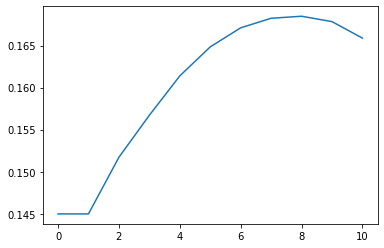

In [14]:
import matplotlib.pyplot as plt

print(np.shape(W1))
plt.plot(W1[0, 0, :])

## 03.3. Implement MLP using Keras

In [ ]:
import tensorflow as tf

# Define the training parameters
hidden_size = 256
number_epochs = 10
batch_size = 256
learning_rate = 0.1

# Initialize the model (as a feedforward NN)
model = tf.keras.Sequential()

# Add an input with the number of features
model.add(tf.keras.Input(shape=input_size))

# Add a densely-connected NN layer with ReLU activation and with initialized weights and bias
model.add(tf.keras.layers.Dense(hidden_size, activation="relu", \
                                kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01), \
                                bias_initializer="zeros"))

# Add another densely-connected NN layer without activation and with initialized weights and bias
model.add(tf.keras.layers.Dense(output_size, activation=None, \
                                kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01), \
                                bias_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01)))

# Configure the model for training with gradient descent optimizer and cross-entropy loss
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate), \
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), \
              metrics=["accuracy"])

# Train the model give the batch size and number of epochs
model.fit(x=train_inputs, y=train_outputs, batch_size=batch_size, epochs=number_epochs, verbose=1)

## 03.2. Implement MLP using a simple EA

In [27]:
# Define the training parameters
hidden_size = 256
number_epochs = 10
batch_size = 256
mutation_scale = 0.01

# Initialize the weights and biases
model_weights0 = np.random.normal(loc=0.0, scale=0.01, size=(input_size, hidden_size))
model_biases0 = np.zeros(hidden_size)
model_weights1 = np.random.normal(loc=0.0, scale=0.01, size=(hidden_size, output_size))
model_biases1 = np.random.normal(loc=0.0, scale=0.01, size=output_size)

W1 = model_weights1

# Initialize the loss and the accuracy for all the batches
number_batches = int(np.ceil(number_train/batch_size))
train_loss = np.zeros(number_batches)
train_accuracy = np.zeros(number_batches)

# Define a function to compute the forward pass
def forward(model_inputs, model_weights0, model_biases0, model_weights1, model_biases1): 
    
    # Compute the predicted outputs using the inputs, and the learned weights and biases
    model_outputs0 = np.matmul(model_inputs, model_weights0) + model_biases0
    model_outputs0[model_outputs0<0] = 0
    model_outputs1 = np.matmul(model_outputs0, model_weights1) + model_biases1
    
    # Compute the conditional probabilities of each class using the softmax function
    # (modified to avoid numerical stability issues)
    model_outputs1 = model_outputs1-np.max(model_outputs1, axis=1)[:, np.newaxis]
    model_exp = np.exp(model_outputs1)
    model_softmax = model_exp/np.sum(model_exp, axis=1)[:, np.newaxis]
    
    return model_outputs0, model_outputs1, model_exp, model_softmax

# Loop over the epochs
for i in range(number_epochs):
    
    # Compute the forward pass
    _, _, _, test_softmax \
    = forward(test_inputs, model_weights0, model_biases0, model_weights1, model_biases1)
    
    # Compute the classification accuracy given the true test labels
    test_accuracy = np.mean(np.argmax(test_softmax, axis=1)==test_labels)
    
    # Loop over the batches
    k = 0
    for j in range(0, number_train, batch_size):
        
        # Derive the end index for the current batch
        j2 = min(j+batch_size, number_train)
    
        # Compute the forward pass
        train_outputs0, train_outputs1, train_exp, train_softmax \
        = forward(train_inputs[j:j2, :], model_weights0, model_biases0, model_weights1, model_biases1)
        
        # Compute the cross-entropy loss given the true train outputs
        # (rewritten to avoid numerical stability issues)
#         train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]*np.log(train_softmax), axis=1))
        train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]\
                                        *(train_outputs1-np.log(np.sum(train_exp, axis=1)[:, np.newaxis])), axis=1))
        
        # Compute the classification accuracy given the true train labels
        train_accuracy[k] = np.mean(np.argmax(train_softmax, axis=1)==train_labels[j:j2])
        
        # Do not need to make the last updates after computing the last loss
        if i < number_epochs-1 or k < number_batches-1:
            
            # Initialize the next loss
            train_loss2 = np.inf
            
            # While the next loss is higher
            while train_loss2 >= train_loss[k]:
                
                # Mutate the weights and biases
                model_weights02 = model_weights0 + np.random.normal(loc=0.0, scale=mutation_scale*np.std(model_weights0), size=(input_size, hidden_size))
                model_biases02 = model_biases0 + np.random.normal(loc=0.0, scale=mutation_scale*np.std(model_biases0), size=hidden_size)
                model_weights12 = model_weights1 + np.random.normal(loc=0.0, scale=mutation_scale*np.std(model_weights1), size=(hidden_size, output_size))
                model_biases12 = model_biases1 + np.random.normal(loc=0.0, scale=mutation_scale*np.std(model_biases1), size=output_size)
                
                # Compute the new outputs and loss
                _, train_outputs1, train_exp, train_softmax \
                = forward(train_inputs[j:j2, :], model_weights02, model_biases02, model_weights12, model_biases12)
                train_loss2 = np.mean(-np.sum(train_outputs[j:j2, :]\
                                                *(train_outputs1-np.log(np.sum(train_exp, axis=1)[:, np.newaxis])), axis=1))
                train_accuracy2 = np.mean(np.argmax(train_softmax, axis=1)==train_labels[j:j2])
                
            # Update the weights, biases, and loss
            model_weights0 = model_weights02
            model_biases0 = model_biases02
            model_weights1 = model_weights12
            model_biases1 = model_biases12
            train_loss[k] = train_loss2
            train_accuracy[k] = train_accuracy2
        
        # Update the index
        k = k+1
    
    W1 = np.dstack((W1, model_weights1))
    
    # Print the epoch and loss
    print(f"Epoch: {i}; train loss: {np.mean(train_loss)}; train accuracy: {np.mean(train_accuracy)}; test accuracy: {test_accuracy}")

Epoch: 0; train loss: 2.301004729048659; train accuracy: 0.13789893617021276; test accuracy: 0.0951
Epoch: 1; train loss: 2.2973307292592575; train accuracy: 0.23572695035460992; test accuracy: 0.2031
Epoch: 2; train loss: 2.293383399927025; train accuracy: 0.28927304964539; test accuracy: 0.2561
Epoch: 3; train loss: 2.2891155950664093; train accuracy: 0.3130596187943262; test accuracy: 0.3061
Epoch: 4; train loss: 2.2843867807243337; train accuracy: 0.34269171099290785; test accuracy: 0.3178
Epoch: 5; train loss: 2.279916903977923; train accuracy: 0.37185837765957447; test accuracy: 0.3581
Epoch: 6; train loss: 2.275013204202445; train accuracy: 0.3753933953900709; test accuracy: 0.3712
Epoch: 7; train loss: 2.2696354843855433; train accuracy: 0.373936170212766; test accuracy: 0.3677
Epoch: 8; train loss: 2.264058615487657; train accuracy: 0.3751883865248227; test accuracy: 0.3677
Epoch: 9; train loss: 2.2583721626738527; train accuracy: 0.38746121453900706; test accuracy: 0.3755
